# Práctica 2: Señales y sistemas discretos.

**Integrantes:**
Angie Triana,
Erika Gómez y
Ana Mejía.

In [3]:
#Se importan las librerías necesarias, en este caso Numpy y Matplotlib. 
import numpy as np
import matplotlib.pyplot as plt

# Secuencias Discretas Elementales 

# Ejemplo:
 *Implementación de impulso unitario mediante función*

## Impulso unitario

In [7]:
def impseq(n0, n1, n2):
#   Genera x(n) = delta(n-n0); n1 <= n <= n2
#	 ----------------------------------------------
    n = np.arange(n1,n2+1) # Se crea el vector de muestras
    x = (n-n0) == 0
    return [x,n]
    
#n0: el 0 del vector fila. Índice donde el impulso debe ser uno.
#n1: valor mínimo - índice inicial del rango de la secuencia.
#n2: valor máximo - índice final del rango de la secuencia.

In [8]:
x,n = impseq(0,-5,5)

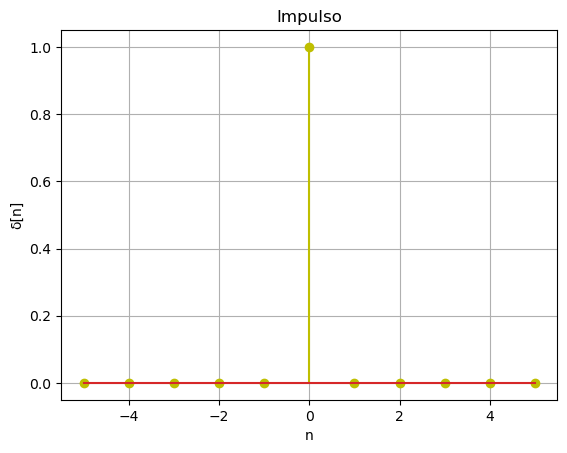

In [9]:
plt.stem(n, x, linefmt='y') #Se grafica la señal de impulso.
plt.xlabel("n")
plt.ylabel("δ[n]")
plt.title("Impulso")
plt.grid()
plt.show()

## 1) Escalón unitario 

Implemente una función en Python que permita generar una función escalón unitario, definida en un intervalo n1≤n0≤n2.

In [11]:
def escalon(n0, n1, n2):
    n = np.arange(n1, n2 + 1) 
    x = (n - n0) >= 0         
    return [x,n]              

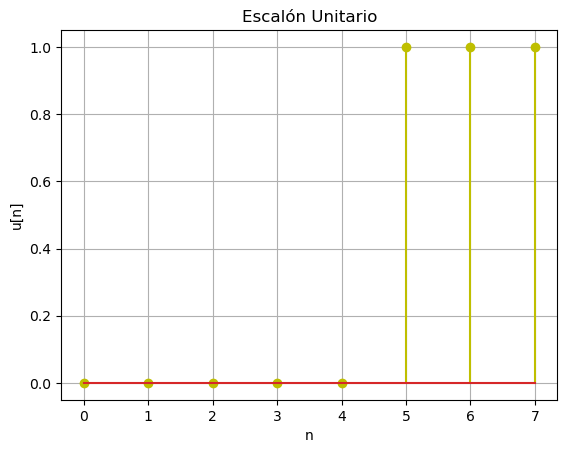

In [12]:
x, n = escalon(5,0,7) #n0 = 0, n1 = -5, n2 = 5. Desde n >= 5, la señal toma valores de 1. En cualquier otro caso es 0.
plt.stem(n,x, linefmt='y')
plt.xlabel("n")
plt.ylabel("u[n]")
plt.title("Escalón Unitario")
plt.grid()
plt.show()

## Rampa

## 2) Implemente en una función en Python que permita generar una función rampa, definida en un intervalo n1≤n0≤n2.

In [15]:
def rampa(n0, n1, n2, m):
    n = np.arange(n1, n2 + 1)  # Crear el vector de índices
    x = np.where(n-n0>=0, m * (n - n0), 0)  # Aplicar la pendiente m para n >= n0. Será 0 en cualquier otro caso
    return [x, n]

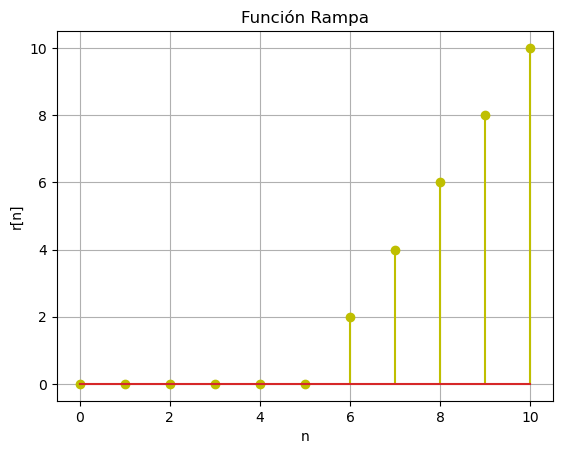

In [16]:
x, n = rampa(5, 0, 10, 2)  # Rampa con pendiente m = 2, que comienza en n = 5
plt.stem(n,x, linefmt='y')
plt.xlabel("n")
plt.ylabel("r[n]")
plt.title("Función Rampa")
plt.grid()
plt.show()

## 3) Generación de secuencias usando las funciones básicas de Python que se han presentado y gráfico de resultados.

### a) x1(n)=3δ(n+1) + 5δ(n+3) + 3δ(n+2)+ 3δ(n) + δ(n). ¿Cómo debe ser el vector de muestras?

### Al crear el vector de muestras, es de suma importancia considerar el rango de índices para que se incluyan en el vector los índices donde se generan los impulsos, de manera que no se excluya ningún componente. En este caso, los impulsos se dan en un rango de -3 a 0, por lo que el rango de índices relevantes es n = [-3, -2, -1, 0].

In [19]:
n1,n2=-6,6 # Se define el índice inicial y final de la secuencia.
impulso_0,n=impseq(0,n1,n2) #Establecemos el primer impulso. El n seguirá siendo igual para todos los casos. 

In [20]:
impulso_1 = 3*impseq(-1, n1, n2)[0]  # Impulso desplazado 1 unidad a la izquierda y escalado por 3.
impulso_2 = 5*impseq(-3, n1, n2)[0] # Impulso desplazado 3 unidades a la izquierda y escalado por 5.
impulso_3= 3*impseq(-2, n1, n2)[0] # Impulso desplazado 2 unidades a la izquierda y escalado por 3.
impulso_4= 3*impulso_0 #Impulso escalado por 3

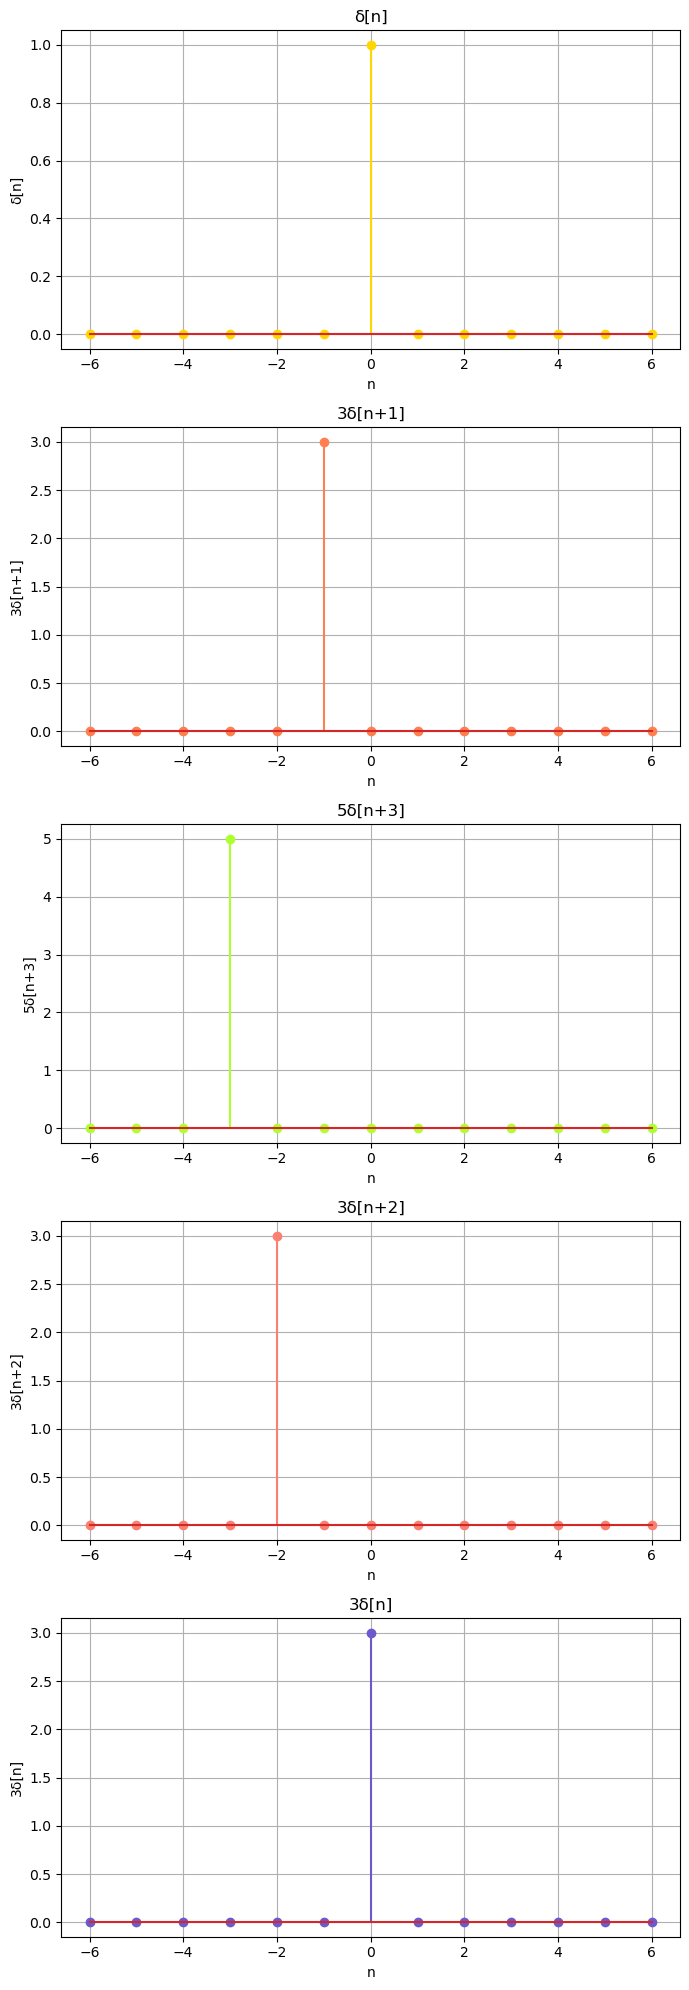

In [21]:
fig_1, ax= plt.subplots(5, figsize=(7,20))
ax[0].set_title('δ[n]')
ax[0].set_xlabel('n')
ax[0].set_ylabel('δ[n]')
ax[1].set_title('3δ[n+1]')
ax[1].set_xlabel('n')
ax[1].set_ylabel('3δ[n+1]')
ax[0].stem(n, impulso_0, linefmt='#FFD700')
ax[1].stem(n, impulso_1, linefmt='#FF7F50')
ax[0].grid()
ax[1].grid()

ax[2].set_title('5δ[n+3]')
ax[2].set_xlabel('n')
ax[2].set_ylabel('5δ[n+3]')
ax[2].stem(n,impulso_2,linefmt='#ADFF2F')
ax[2].grid()

ax[3].set_title('3δ[n+2]')
ax[3].set_xlabel('n')
ax[3].set_ylabel('3δ[n+2]')
ax[3].stem(n,impulso_3,linefmt='#FA8072')
ax[3].grid()

ax[4].set_title('3δ[n]')
ax[4].set_xlabel('n')
ax[4].set_ylabel('3δ[n]')
ax[4].stem(n,impulso_4,linefmt='#6A5ACD')
ax[4].grid()

plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.05, hspace=10)
plt.tight_layout()
plt.show()

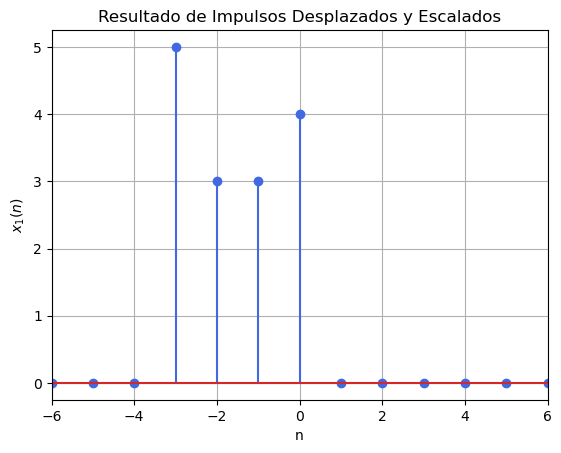

In [22]:
x_1 = impulso_1 + impulso_2 + impulso_3 + impulso_4 + impulso_0 #Se realiza la suma de los impulsos escalados y desplazados
plt.stem(n, x_1, linefmt='#4169E1')
plt.xlim(-6,6)
plt.xlabel('n')
plt.ylabel('$x_1(n)$')
plt.title('Resultado de Impulsos Desplazados y Escalados')
plt.grid()
plt.show()

### b) El siguiente sistema arroja una secuencia definida entre -6≤n≤6.

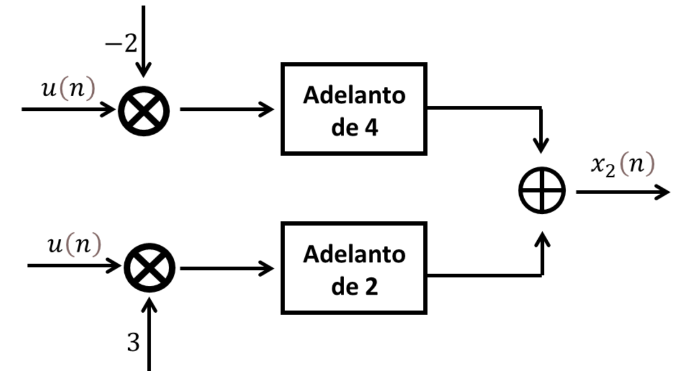

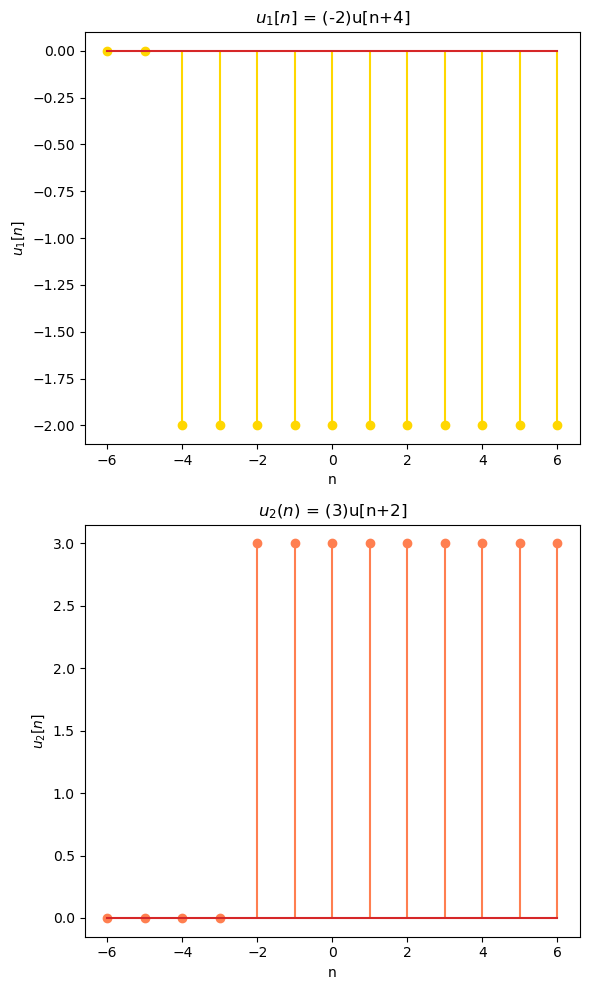

In [25]:
n1,n2 = -6,6
u_1,n = escalon(-4,n1,n2)
u_1 = -2 *escalon(-4,n1,n2)[0]
u_2 = 3 * escalon(-2,n1,n2)[0]
fig_1, ax= plt.subplots(2, figsize=(6,10))
ax[0].set_title('$u_1[n]$ = (-2)u[n+4]')
ax[0].set_xlabel('n')
ax[0].set_ylabel('$u_1[n]$')
ax[1].set_title('$u_2(n)$ = (3)u[n+2]')
ax[1].set_xlabel('n')
ax[1].set_ylabel('$u_2[n]$')
ax[0].stem(n, u_1, linefmt='#FFD700')
ax[1].stem(n, u_2, linefmt='#FF7F50')
plt.tight_layout()
plt.show()

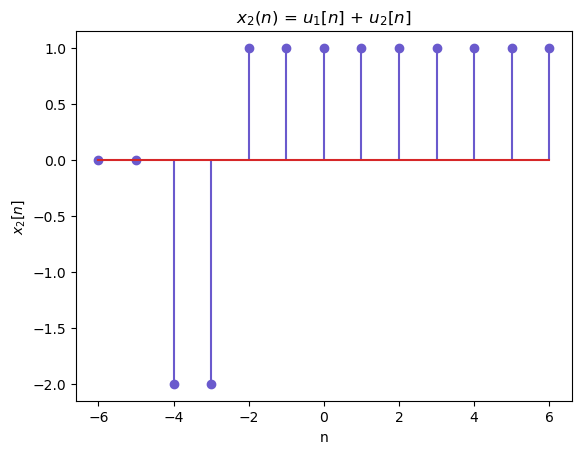

In [26]:
x_2 = u_1 + u_2
plt.stem(n,x_2, linefmt='#6A5ACD')
plt.xlabel("n")
plt.ylabel('$x_2[n]$')
plt.title('$x_2(n)$ = $u_1[n]$ + $u_2[n]$')
plt.show()

### c) El siguiente sistema arroja una secuencia definida entre 0≤n≤100.
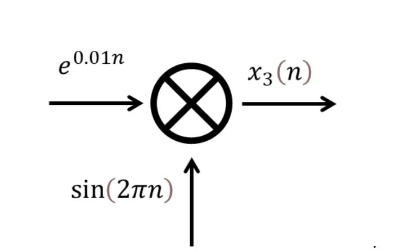

In [28]:
def senoeuler(n1,n2):
  rs=[]
  ns=np.linspace(n1,n2+1) #Se crea el vector de muestra.
  for j in ns: #For j en el vector de muestra (se recorre el vector de muestra)
    agre=np.exp(0.01 * j) * np.sin(2 * np.pi * j) #
    rs.append(agre)
  return (rs)

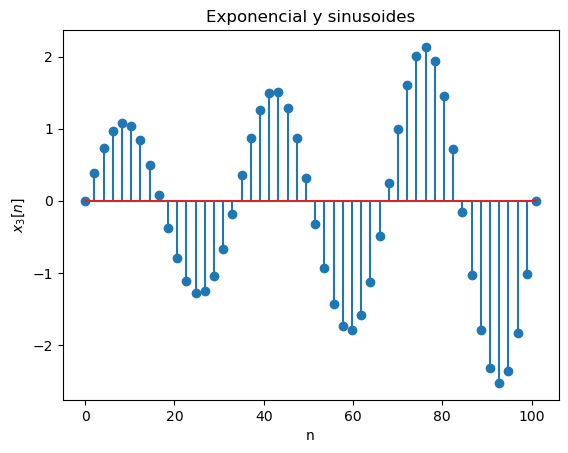

In [29]:
# Exponencial y senusoides con intervalo 0≤n≤n100
n1s=0
n2s=100
result5=senoeuler(n1s,n2s)
xs=np.linspace(n1s,n2s+1)
plt.stem(xs,result5)
plt.xlabel("n")
plt.ylabel('$x_3[n]$')
plt.title("Exponencial y sinusoides")
plt.show()

## d) x4(n)=2r(n+3)-r(n-2)-5u(n-3), -10≤n≤10

In [31]:
rampa_n,n=rampa(-3,-10,10,1)

In [32]:
rampa_1 = 2*rampa_n
rampa_2 = rampa(2,-10,10,1)[0]
escalon_1=5*escalon(3,-10,10)[0]

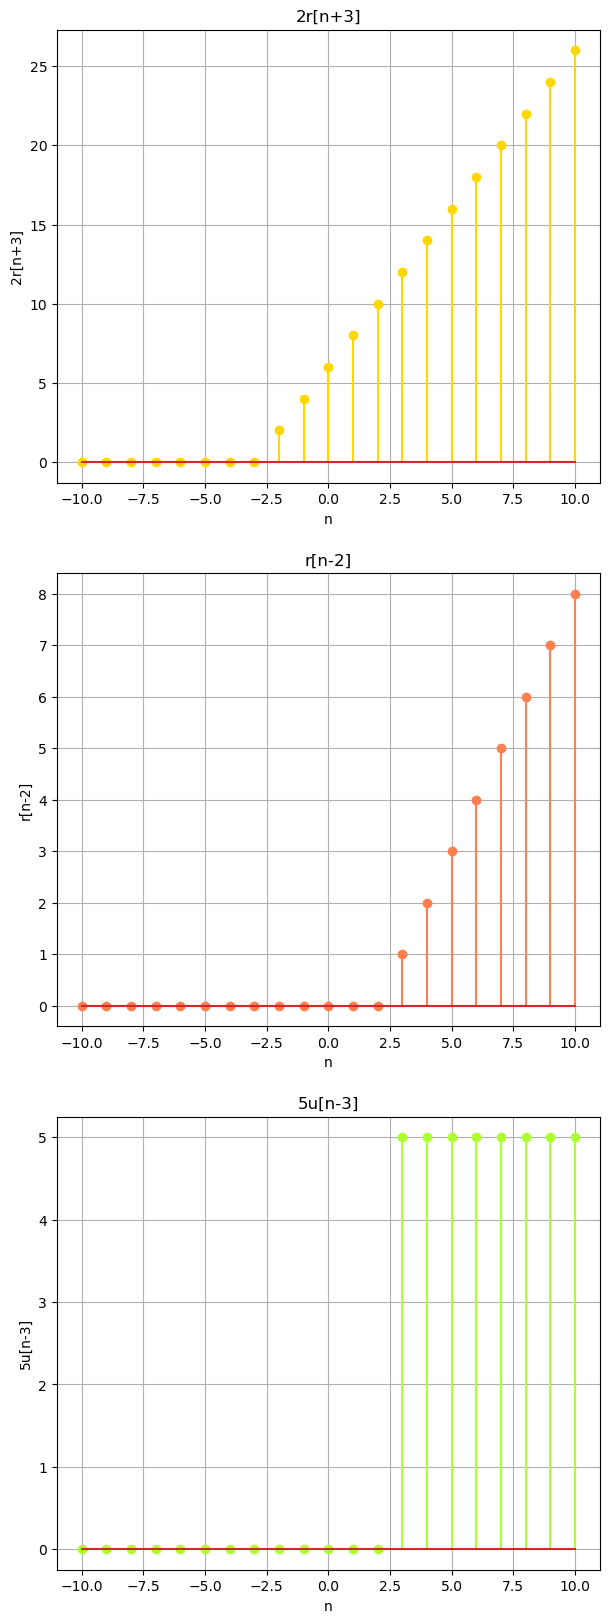

In [33]:
#Gráficos de las señales
fig_1, ax= plt.subplots(3, figsize=(7,20))
ax[0].set_title('2r[n+3]')
ax[0].set_xlabel('n')
ax[0].set_ylabel('2r[n+3]')
ax[1].set_title('r[n-2]')
ax[1].set_xlabel('n')
ax[1].set_ylabel('r[n-2]')
ax[1].grid()
ax[0].stem(n, rampa_1, linefmt='#FFD700')
ax[0].grid()
ax[1].stem(n, rampa_2, linefmt='#FF7F50')
ax[2].set_title('5u[n-3]')
ax[2].set_xlabel('n')
ax[2].set_ylabel('5u[n-3]')
ax[2].stem(n, escalon_1 ,linefmt='#ADFF2F')
ax[2].grid()

In [34]:
x_4 = (rampa_1) - (rampa_2) - (escalon_1) #Se hace la resta de las señales 

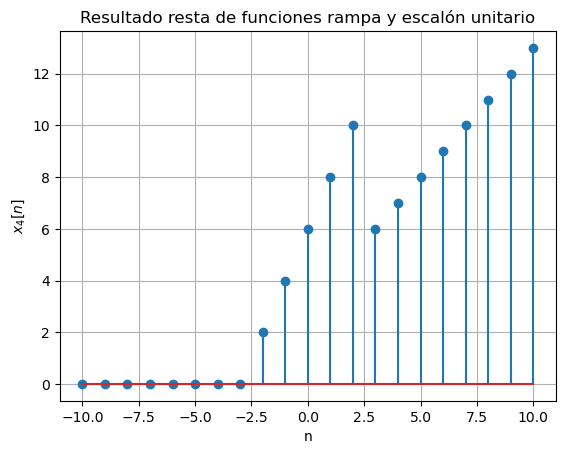

In [35]:
plt.stem(n,x_4)
plt.xlabel("n")
plt.ylabel("$x_4[n]$")
plt.title("Resultado resta de funciones rampa y escalón unitario")
plt.grid()
plt.show()

## 4) Genere la siguiente secuencia
 ## X[n] = r[n] 0<=n<=5 , r[n] 6<=n<=11 ,r[n] 12<=n<=17

## a. Derive la secuencua

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#  Función rampa con pendiente
def rampa(n0, n, m):
    return np.where(n - n0 >= 0, m * (n - n0), 0)

n = np.arange(0, 10+1)  # Rango de n desde 0 hasta 17
x = np.empty_like(n) 

for i in range(len(n)): #Secuencia para cumplir con los requisitos
    if 0 <= n[i] <= 5:
        x[i] = rampa(0, n[i],2)  #Cuando 0 <= n <= 5
    elif 6 <= n[i] <= 11:
        x[i] = rampa(5, n[i],2)  # Cuando 6 <= n <= 11
    elif 12 <= n[i] <= 17:
        x[i] = rampa(10, n[i],2) # rcuando 12 <= n <= 17

derivada_x = np.diff(x, prepend=0)




## b.Subplot de las dos secuencias, la original y la derivada

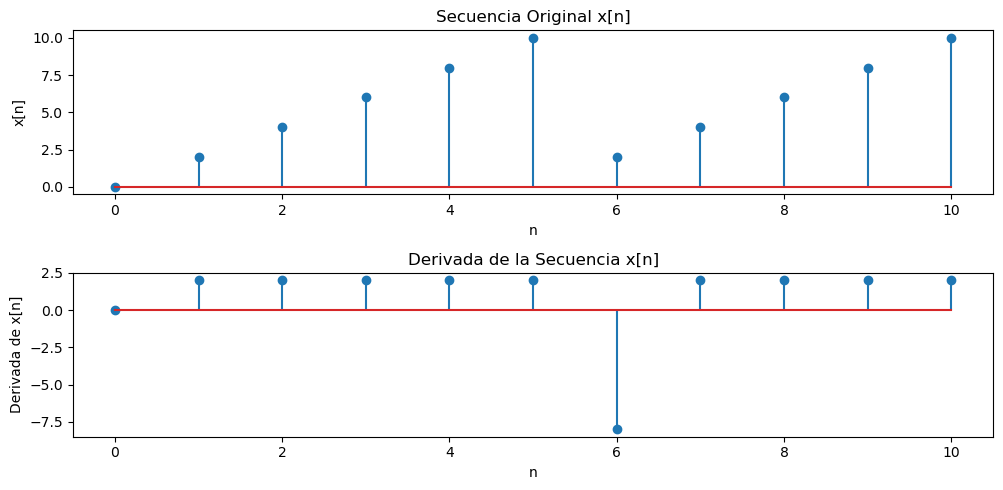

In [2]:
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.stem(n, x)
plt.title('Secuencia Original x[n]')
plt.xlabel('n')
plt.ylabel('x[n]')

plt.subplot(2, 1, 2)
plt.stem(n, derivada_x)
plt.title('Derivada de la Secuencia x[n]')
plt.xlabel('n')
plt.ylabel("Derivada de x[n]")

plt.tight_layout()
plt.show()

## 5) Generación de la secuencia x(n)={0,1,2,3,4,5 ̂,4,3,2,1,0,1,2,3,4,5,5,5,5,10,10,10,10} y gráfico del resultado. Uso de las funciones que rampa y escalón unitario para generar la secuencia concatenando secuencias más simples. 


In [38]:
#Generación de la secuencia
x_n=np.array([0,1,2,3,4,5,4,3,2,1,0,1,2,3,4,5,5,5,5,10,10,10,10])
n=np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,16])

In [39]:
#Concatenando escalones unitarios escalados y rampas 
n=np.arange(-5,18) #Se crea un n de la cantidad de elementos, con un índice inicial en -5 (n1) y un índice final en 17 (n2)
rampa1=rampa(-5,-5,0,1)[0]
rampa2=rampa(-5,-5,-1,1)[0][::-1] #Se refleja la rampa respecto al eje vertical
rampa3=rampa(5,5,9,1)[0][1:] #Se elimina el primer valor para evitar redundancia
escalon1=5*escalon(10,10,13)[0]
escalon2=10*escalon(14,14,17)[0]
x_n_concatenada=np.concatenate([rampa1,rampa2,rampa3,escalon1,escalon2])

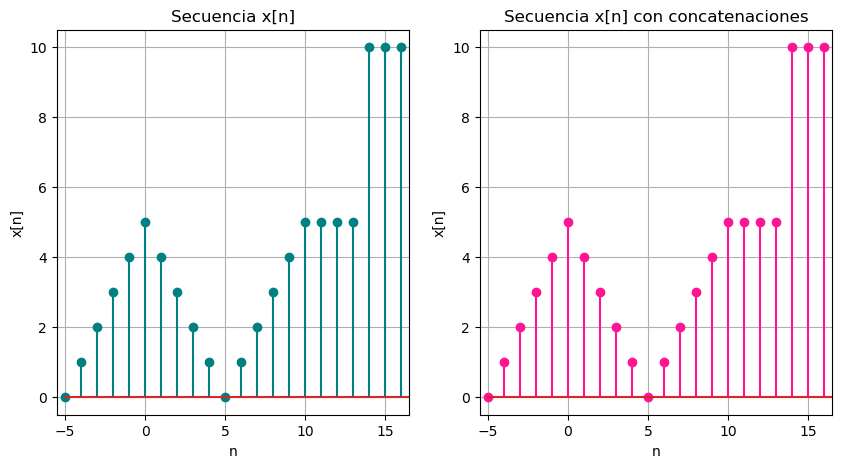

In [40]:
fig, ax=plt.subplots(1,2, figsize=(10,5))
ax[0].stem(n,x_n,linefmt='#008080')
ax[0].set_title('Secuencia x[n]')
ax[0].set_xlabel('n')
ax[0].set_ylabel('x[n]')
ax[0].set_xlim(-5.5,16.5)
ax[0].grid()
ax[1].stem(n,x_n_concatenada,linefmt='#FF1493')
ax[1].set_title('Secuencia x[n] con concatenaciones')
ax[1].set_xlabel('n')
ax[1].set_ylabel('x[n]')
ax[1].set_xlim(-5.5,16.5)
ax[1].grid()
plt.show()

### a) x_5 (n)= 2*x(n-4) + x(n)

In [42]:
n_2=np.arange(-5+4,18+4)
#Se realizan los retrasos de 4 unidades x(n-4)
rampa1=rampa(-5+4,-5+4,0+4,1)[0]
rampa2=rampa(-5+4,-5+4,-1+4,1)[0][::-1] #Se refleja la rampa respecto al eje vertical
rampa3=rampa(5+4,5+4,9+4,1)[0][1:] #Se elimina el primer valor para evitar 2 ceros continuos.
escalon1=5*escalon(10+4,10+4,13+4)[0]
escalon2=10*escalon(14+4,14+4,17+4)[0]

x_n_4d=np.concatenate([rampa1,rampa2,rampa3,escalon1,escalon2]) #x(n-4)

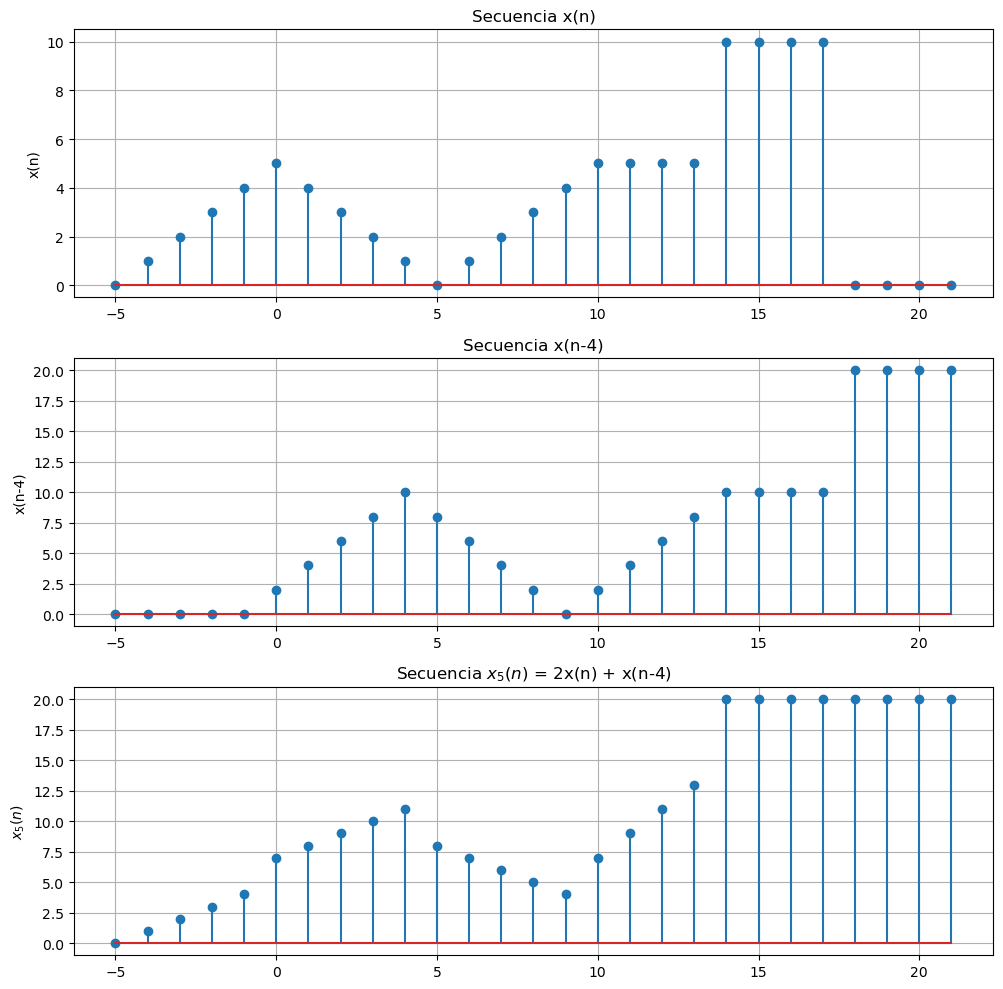

In [43]:
#Se define el rango final al sumar ambas secuencias.
n_suma = np.arange(-5, 22)

# Ahora, para asegurarnos de poder realizar la suma entre las secuencias, se agregarán ceros al final de x(n), y al inicio de x(n-4)
#Así nos aseguramos de que el parámetro 'size' coincida.
x_n_exp=np.concatenate([x_n,np.zeros(4)]) #Se agregan 4 ceros al final de la secuencia.
x_n_4d_exp=np.concatenate([np.zeros(4), x_n_4d]) #Se agregan 4 ceros al inicio de la secuencia.

# Se realiza la suma de las secuencias expandidas, teniendo el mismo tamaño.
x_5 = 2*x_n_4d_exp + x_n_exp


plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.stem(n_suma, x_n_exp)
plt.title('Secuencia x(n)')
plt.ylabel('x(n)')
plt.grid()
plt.subplot(3, 1, 2)
plt.stem(n_suma, 2*x_n_4d_exp)
plt.title('Secuencia x(n-4)')
plt.ylabel('x(n-4)')
plt.grid()

plt.subplot(3, 1, 3)
plt.stem(n_suma, x_5)
plt.title('Secuencia $x_5(n)$ = 2x(n) + x(n-4)')
plt.ylabel('$x_5(n)$')

plt.grid()
plt.tight_layout()
plt.show()

In [44]:
x_5

array([ 0.,  1.,  2.,  3.,  4.,  7.,  8.,  9., 10., 11.,  8.,  7.,  6.,
        5.,  4.,  7.,  9., 11., 13., 20., 20., 20., 20., 20., 20., 20.,
       20.])

### b) 	x_6 (n)=(0.001e^0.5n)x(n) + 10sin(0.05πn)x(n+2),-20≤n≤20

In [46]:
#Primero, debemos ajustar la secuencia x_n, para que el rango sea de -20 a 20, agregando ceros tanto al inicio como al final. 

In [47]:
n=np.arange(-20,21) #Definimos el vector de muestra.

In [48]:
x_n=np.concatenate([np.zeros(15),x_n,np.zeros(3)])
#Se agregan 15 ceros a la izquierda, y 3 ceros a la derecha. 

In [49]:
x_n

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  2.,  3.,  4.,  5.,  4.,  3.,  2.,  1.,  0.,
        1.,  2.,  3.,  4.,  5.,  5.,  5.,  5., 10., 10., 10., 10.,  0.,
        0.,  0.])

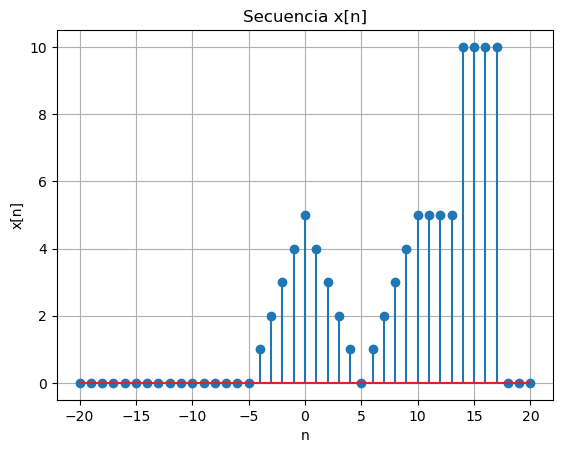

In [50]:
plt.stem(n,x_n)
plt.title('Secuencia x[n]')
plt.ylabel('x[n]')
plt.xlabel('n')
plt.grid()

In [51]:
#Creamos la secuencia x[n+2] desplazada dos unidades a la izquierda 
n_3=np.arange(-5-2,18-2)
rampa1=rampa(-5-2,-5-2,0-2,1)[0]
rampa2=rampa(-5-2,-5-2,-1-2,1)[0][::-1] #Se refleja la rampa respecto al eje vertical
rampa3=rampa(5-2,5-2,9-2,1)[0][1:] #Se elimina el primer valor para evitar 2 ceros continuos.
escalon1=5*escalon(10-2,10-2,13-2)[0]
escalon2=10*escalon(14-2,14-2,17-2)[0]
x_n_2d=np.concatenate([rampa1,rampa2,rampa3,escalon1,escalon2]) #x(n+2)

In [52]:
#Esta señal también debe ser ajustada para tener un parámetro 'size' que coincida con el n para x6(n).
x_n_2d_exp=np.concatenate([np.zeros(13), x_n_2d, np.zeros(5)]) #x(n+2)

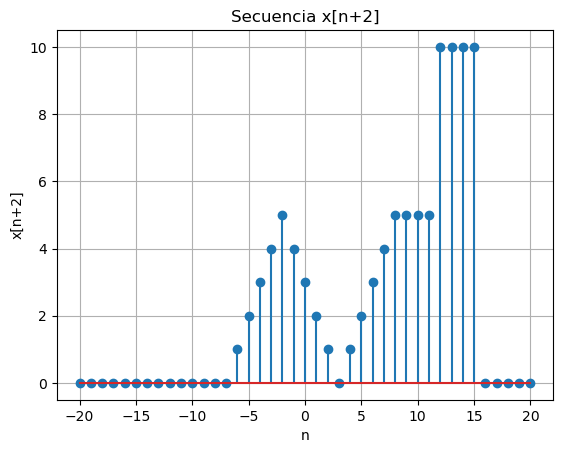

In [53]:
plt.stem(n, x_n_2d_exp)
plt.title('Secuencia x[n+2]')
plt.ylabel('x[n+2]')
plt.xlabel('n')
plt.grid()

In [54]:
x_6=0.001*np.exp(0.5*n)*(x_n)+ 10*np.sin(0.05*np.pi*n)*x_n_2d_exp

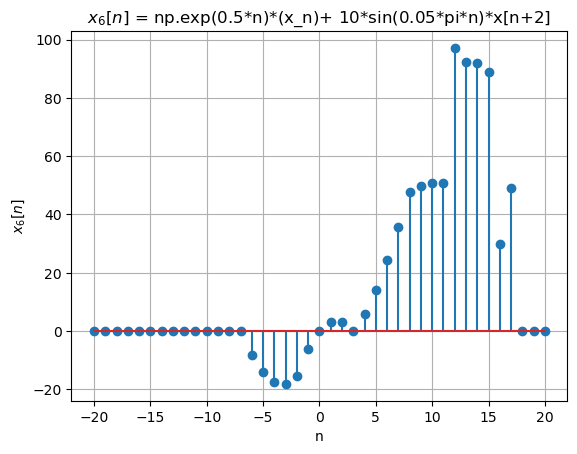

In [55]:
plt.stem(n,x_6)
plt.title('$x_6[n]$ = np.exp(0.5*n)*(x_n)+ 10*sin(0.05*pi*n)*x[n+2]')
plt.ylabel('$x_6[n]$')
plt.xlabel('n')
plt.grid()